# Entropy, conditional entropy, and mutual information

Overview:
* In this tutorial, we will learn how to describe the information that is shared between two variables (mutual information). In other words, how much uncertainty reduction is there to be had about variable 1 by measuring variable 2? 

* These concepts were initially developed in communication theory to describe the efficacy of transmitting signals over a noisy medium (like a noisy telephone line). For example, suppose that we want to know how good a communication channel is, or its effeciency in reliably relaying a message from point A (a 'sender') to point B (a 'reciever').

* Basically this is just like asking, "we know how good the signal is at A, and we recieved the message at B - how much information about A is still in the received signal B?". 

* So that is the general gist of it, but right away you can see the potential applicability of this metric in many fields of neuroscience, psychology, engeneering, etc. In neuroscience, we're dealing with a series of communication channels that are corrupted by noise (e.g. synapses). It is therefore reasonable to ask: how much information from neuron A effectively propogates to neuron B? (or conversely, how much  information is lost?).

* However, this logic works for any combination of variables: two continuous variables, two discrete variables, one continuous and one discrete, etc. As a result, we can ask questions about any two variables really: how much information about median home  price is reflected in stock market fluctuations? In machine learning, you can use mutual information to select the most informative features in a training data set (sklearn has some great tools for this)

* A few notes before we get started. First, we're going to be talking a lot about **uncertainty** and **uncertainty reduction**. While this is basically complementary to talking about certainty and an increase in certainty, we'll deal with the former terminology as it is embedded in some of the concepts that we'll discuss. 

* Second, we'll be dealing with variability in data, and how we can either attribute that variability in the data to 'noise' or to 'signals'. I.e. does the variability in one variable systematically change with the variability in another? 

<div class="alert alert-info">
Finally, a lot of people think at this point, "why not just correlate the variables using a normal r-value?". There are a few answers to this, but the simplest is this: correlation assumes a linear relationship (or, in more complex forms, you have to assume some relationship) between variables. Mutual information does not, and can generally capture any form of linear or non-linear relationship between two variables. This makes it a very powerful and general purpose metric.
</div>

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Entropy as a measure of variability

* Shannon Entropy is related to the variability of data, but is more specifically defined as the average uncertainty in a set of measurements 
* Consider coin tosses - let's say we have a balanced coin, and we flip it once. We can represent the outcome of a single toss as a 0 or a 1 (a head or a tail), and this has an entropy (uncertainty) of 1 bit. In other words, we would reduce our uncertainty completely after we observed the outcome, and that would correspond to a reduction of 1 bit. 
    * By extension, if we flipped the coin twice, then the entropy would be 2 bits (00, 01, 10, or 11) because we would reduce our uncertainty by 2 bits after we observed the outcome. 

* To keep with the coin analogy...when the coin is balanced and heads and tails are equally likely, then the entropy is highest because uncertainty is maximized and flipping the coin will give you 1 bit of information.  
* To see why entropy is maximized in this situation, consider a biased coin  that comes up heads 60% the time. 
    * In this case, we could predict the outcome of the coin flip better than chance simply by going with our prior of 'heads'. Thus, the entropy assoicated with a biased coin is less than the entropy associated with the unbiased coin, because the reduction in uncertainty is lower with the biased coin than with the unbaised coin. 
    * We learn less after flipping the biased coin than we do when we flip the unbiased coin. 
* This example brings up an important point: entropy as a measure of uncertainty is maximized when all possible outcomes are equally likely because you have no prior info upon which to make an educated guess about the outcome (i.e. a uniform distribution on the span of possible outcomes has the highest entropy). 

In [5]:
# entropy - uncertainty....how much can you learn by measuring....

np.log2(8)  # 2**x = N, x == 1


3.0

In [10]:
n = 16

np.log2(16)

4.0

In [12]:
n = 16

H = 0
for i in np.arange(n):
    H += - ( (1/n) * np.log2(1/n) )
    
print(H)
    
H = 0
for i in np.arange(n):
    H += -np.log2(1/n)

print(H/n)

4.0
4.0


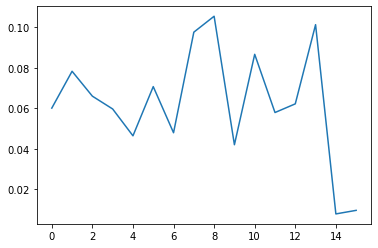

3.8279550259738846


In [13]:
np.random.seed(0)

n = 16

px = np.random.rand(n)
px /= np.sum(px)

# numpy way...
H = -np.sum(px * np.log2(px))

plt.plot(px)
plt.show()

print(H)

## Mutual information (MI). 

* MI is a measure of how much knowing  about 1 variable tells you about the state of another variable. Putting aside entropy and measures of uncertainty/variance for a minute, here is the  intuition. 
    * Suppose you have two variables that are completely unrelated to each other: measuring one variable will tell you nothing about the state of the other variable. 
    * In contrast, if you have two variables that are perfectly related, then measuring one variable will tell you everything about the state of the other. 
    * In this special (unusual) case, the mutual information will be equal to the entropy of either variable alone (that is: the information gained by measuring one variable will be equal to the information gained by measuring either - i.e., if they are perfectly related then you only need to measure one of them to know everything about the other)
 
To put this back in terms of entropy: lets say we have two variables, X and Y. If we want to assess the MI between X and Y, then we need to know the following difference score:

(total entropy of X) -  (entropy of X given that we know Y). 

In other words, how much is uncertainty about X REDUCED when we measure Y? That is the MI between the two variables. And it leads to one common formulation of MI:

MI = H(X) - H(X|Y)  

where H(X) is the entropy of X, and H(X|Y) is the conditional entropy of X given that we've measured Y - it is the average entropy of X across all values of Y

In [18]:
np.random.seed(0)

N = 1000
x = np.round(np.random.rand(N))
y = np.round(np.random.rand(N))

# introduce some dependence
p = .95    # proportion...
ind = int(p*N)

y[:ind] = x[:ind]

# now figure out px - each poss outcome
px = np.zeros(2)
px[0] = np.sum(x) / N
px[1] = 1 - px[0]
print(px)

Hx = -np.sum( px * np.log2(px) )
print(Hx)

Hxy = 0
# possible values of y
for i in np.arange(2):
    
    py = np.sum(y==i) / N
    
    tmp = 0
    for j in np.arange(2):
        
        px_y = np.sum((x==j) & (y==i)) / np.sum(y==i)
        tmp += -(px_y * np.log2(px_y))
        
    Hxy += (py * tmp)
    
MI = Hx - Hxy
print(MI)

[0.483 0.517]
0.9991659615315873
0.8149294036605923


## sklearn way...

In [22]:
from sklearn.metrics import mutual_info_score

# this is in nats (natural log), but can convert to bits...
MI = mutual_info_score(x,y) * np.log2(np.e)

print(MI)

0.8149294036605925


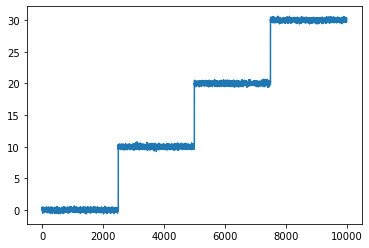

In [54]:
# one discrete and one continuous data set

np.random.seed(0)

N = 10000

num_conds = 4
conds = np.repeat(np.arange(4), N/num_conds)

# now generate some cont data (like your DV...)
cond_means = [0,10,20,30]
cond_stds = [.2,.2,.2,.2]

resp = []
for i in np.arange(num_conds):
    resp = np.hstack( (resp, ((np.random.randn(int(N/num_conds)) * cond_stds[i]) + cond_means[i])) )

plt.plot(resp)
plt.show()


In [55]:
nbins = 20

_ , edges = np.histogram(resp, bins=nbins)

bin_y = np.digitize(resp, edges)


MI = mutual_info_score(conds, bin_y) * np.log2(np.e)
print(MI)



2.0000000000000013


In [42]:
print(np.log2(4))

2.0


In [56]:
# normalized MI (NMI)

# MI = Hx - Hxy

NMI = MI / np.log2(4)
print(NMI)

1.0000000000000007
